In [2]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np
import tensorflow as tf 

In [3]:
TRAIN_DIR = '.\\train'
TEST_DIR = '.\\test'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels

In [5]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [6]:
print(train)

                                        image     label
0         .\train\angry\Training_10118481.png     angry
1         .\train\angry\Training_10120469.png     angry
2         .\train\angry\Training_10131352.png     angry
3         .\train\angry\Training_10161559.png     angry
4          .\train\angry\Training_1021836.png     angry
...                                       ...       ...
28657  .\train\surprise\Training_99916297.png  surprise
28658  .\train\surprise\Training_99924420.png  surprise
28659  .\train\surprise\Training_99937001.png  surprise
28660  .\train\surprise\Training_99951755.png  surprise
28661  .\train\surprise\Training_99984132.png  surprise

[28662 rows x 2 columns]


In [7]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [8]:
print(test)
print(test['image'])

                                        image     label
0       .\test\angry\PrivateTest_10131363.png     angry
1       .\test\angry\PrivateTest_10304478.png     angry
2        .\test\angry\PrivateTest_1054527.png     angry
3       .\test\angry\PrivateTest_10590091.png     angry
4        .\test\angry\PrivateTest_1109992.png     angry
...                                       ...       ...
7166  .\test\surprise\PublicTest_98089595.png  surprise
7167  .\test\surprise\PublicTest_98567249.png  surprise
7168  .\test\surprise\PublicTest_98972870.png  surprise
7169  .\test\surprise\PublicTest_99242645.png  surprise
7170  .\test\surprise\PublicTest_99446963.png  surprise

[7171 rows x 2 columns]
0         .\test\angry\PrivateTest_10131363.png
1         .\test\angry\PrivateTest_10304478.png
2          .\test\angry\PrivateTest_1054527.png
3         .\test\angry\PrivateTest_10590091.png
4          .\test\angry\PrivateTest_1109992.png
                         ...                   
7166    .\test\

In [9]:
from tqdm.notebook import tqdm

In [10]:
def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features
    

In [11]:
train_features = extract_features(train['image']) 
# print(train['image'])

  0%|          | 0/28662 [00:00<?, ?it/s]

D:\Conda\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


#JPEG to PNG

In [ ]:
# from PIL import Image
# import os

# # Set the input and output folder paths
# input_folder = "C:\\Users\\Ramkrishna Ghosh\\Desktop\\New folder2"  # Change this to the path of your folder containing JPG images
# output_folder = "C:\\Users\\Ramkrishna Ghosh\\Desktop\\New folder (3)"  # Change this to the path where you want to save the PNG images

# # Create the output folder if it doesn't exist
# if not os.path.exists(output_folder):
#     os.makedirs(output_folder)

# # Get a list of all files in the input folder
# file_list = os.listdir(input_folder)

# # Loop through the files and convert JPG to PNG
# for filename in file_list:
#     if filename.endswith('.jpeg'):
#         # Open the JPG image
#         with Image.open(os.path.join(input_folder, filename)) as img:
#             # Save the image as PNG in the output folder
#             output_filename = os.path.splitext(filename)[0] + '.png'
#             img.save(os.path.join(output_folder, output_filename), 'PNG')

# print("Conversion completed.")


In [12]:
test_features = extract_features(test['image'])

  0%|          | 0/7171 [00:00<?, ?it/s]

In [13]:
x_train = train_features/255.0
x_test = test_features/255.0

In [14]:
from sklearn.preprocessing import LabelEncoder

In [15]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [16]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [17]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [18]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))


In [22]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [23]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 1, validation_data = (x_test,y_test)) 

224/224 [==============================] - 871s 4s/step - loss: 1.8226 - accuracy: 0.2481 - val_loss: 1.8143 - val_accuracy: 0.2472


In [24]:
model_json = model.to_json()
with open(".\\emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save(".\\emotiondetector.h5")

In [25]:
from keras.models import model_from_json

In [26]:
json_file = open(".\\emotiondetector.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights(".\\emotiondetector.h5")

In [27]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [28]:
def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [29]:
image =".\\test\\neutral\\PrivateTest_932822.png"
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad


D:\Conda\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


1/1 [==============================] - 0s 231ms/step
model prediction is  happy


Epoch 1/10
6449/6449 [==============================] - 1233s 191ms/step - loss: 1.6918 - accuracy: 0.2792 - val_loss: 4.3604 - val_accuracy: 0.0000e+00
Epoch 2/10
6449/6449 [==============================] - 1204s 187ms/step - loss: 1.6908 - accuracy: 0.2793 - val_loss: 4.7151 - val_accuracy: 0.0000e+00
Epoch 3/10
6449/6449 [==============================] - 1215s 188ms/step - loss: 1.6905 - accuracy: 0.2793 - val_loss: 4.4990 - val_accuracy: 0.0000e+00
Epoch 4/10
6449/6449 [==============================] - 1436s 223ms/step - loss: 1.6903 - accuracy: 0.2793 - val_loss: 4.2173 - val_accuracy: 0.0000e+00
Epoch 5/10
6449/6449 [==============================] - 1515s 235ms/step - loss: 1.6907 - accuracy: 0.2793 - val_loss: 4.6136 - val_accuracy: 0.0000e+00
Epoch 6/10
6449/6449 [==============================] - 1119s 173ms/step - loss: 1.6902 - accuracy: 0.2793 - val_loss: 4.4605 - val_accuracy: 0.0000e+00
Epoch 7/10
6449/6449 [==============================] - 850s 132ms/step - loss: 1.

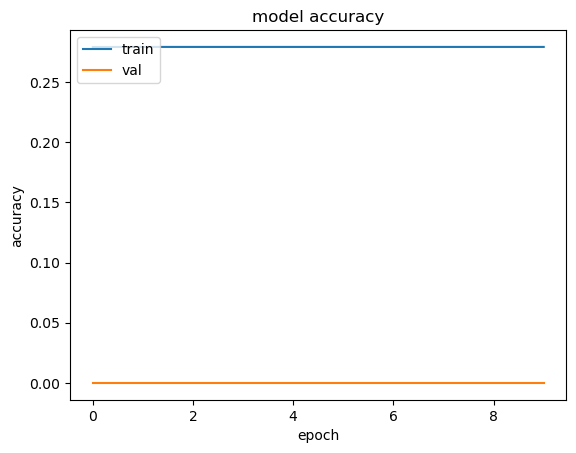

In [31]:
import keras
from matplotlib import pyplot as plt
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )
history = model.fit(x_train, y_train,validation_split = 0.1, epochs=10, batch_size=4)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [19]:
model.compile(optimizer='sgd',loss=tf.keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [23]:
history=model.fit(x_train,y_train,epochs=200,batch_size=10)

Epoch 1/200
2867/2867 [==============================] - 861s 300ms/step - loss: 1.7438 - accuracy: 0.2850
Epoch 2/200
2867/2867 [==============================] - 908s 317ms/step - loss: 1.7071 - accuracy: 0.3137
Epoch 3/200
2867/2867 [==============================] - 870s 303ms/step - loss: 1.6746 - accuracy: 0.3308
Epoch 4/200
2867/2867 [==============================] - 846s 295ms/step - loss: 1.6421 - accuracy: 0.3480
Epoch 5/200
2867/2867 [==============================] - 861s 300ms/step - loss: 1.6042 - accuracy: 0.3676
Epoch 6/200
2867/2867 [==============================] - 921s 321ms/step - loss: 1.5658 - accuracy: 0.3888
Epoch 7/200
2867/2867 [==============================] - 1075s 375ms/step - loss: 1.5323 - accuracy: 0.4026
Epoch 8/200
2867/2867 [==============================] - 1008s 352ms/step - loss: 1.5006 - accuracy: 0.4167
Epoch 9/200
2867/2867 [==============================] - 946s 330ms/step - loss: 1.4661 - accuracy: 0.4301
Epoch 10/200
2867/2867 [===========

In [24]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

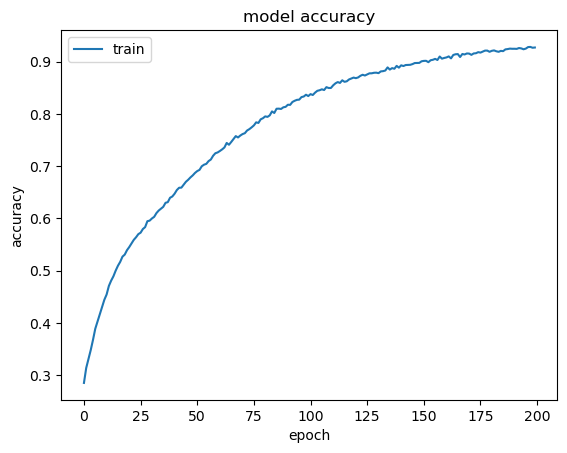

In [25]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Load and preprocess the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
X_train = x_train / 255.0
X_test = x_test / 255.0

# Reshape the data to fit the model
X_train = x_train.reshape(-1, 28, 28, 1)
X_test = x_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Step 2: Build the CNN model
# model = Sequential([
#     Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
#     MaxPooling2D((2, 2)),
#     Conv2D(64, (3, 3), activation='relu'),
#     MaxPooling2D((2, 2)),
#     Flatten(),
#     Dense(64, activation='relu'),
#     Dense(10, activation='softmax')
# ])

# Step 3: Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
# history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Step 5: Evaluate the model on test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Step 6: Make predictions on the test data
y_test_pred = model.predict(X_test)
y_train_pred = model.predict(X_train)

# Step 7: Plot some predictions for training data
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {np.argmax(y_train[i])}\nPred: {np.argmax(y_train_pred[i])}')
    ax.axis('off')

# Step 8: Plot some predictions for test data
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {np.argmax(y_test[i])}\nPred: {np.argmax(y_test_pred[i])}')
    ax.axis('off')

plt.show()


ValueError: in user code:

    File "D:\Conda\Lib\site-packages\keras\engine\training.py", line 1852, in test_function  *
        return step_function(self, iterator)
    File "D:\Conda\Lib\site-packages\keras\engine\training.py", line 1836, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Conda\Lib\site-packages\keras\engine\training.py", line 1824, in run_step  **
        outputs = model.test_step(data)
    File "D:\Conda\Lib\site-packages\keras\engine\training.py", line 1788, in test_step
        y_pred = self(x, training=False)
    File "D:\Conda\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\Conda\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 48, 48, 1), found shape=(None, 28, 28, 1)


In [28]:
y_test_predict=model.predict(x_test)

ValueError: in user code:

    File "D:\Conda\Lib\site-packages\keras\engine\training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "D:\Conda\Lib\site-packages\keras\engine\training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "D:\Conda\Lib\site-packages\keras\engine\training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "D:\Conda\Lib\site-packages\keras\engine\training.py", line 2111, in predict_step
        return self(x, training=False)
    File "D:\Conda\Lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "D:\Conda\Lib\site-packages\keras\engine\input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 48, 48, 1), found shape=(None, 28, 28)


Epoch 1/5
1875/1875 [==============================] - 72s 36ms/step - loss: 0.1427 - accuracy: 0.9571 - val_loss: 0.0458 - val_accuracy: 0.9843
Epoch 2/5
1875/1875 [==============================] - 61s 33ms/step - loss: 0.0457 - accuracy: 0.9859 - val_loss: 0.0364 - val_accuracy: 0.9875
Epoch 3/5
1875/1875 [==============================] - 59s 32ms/step - loss: 0.0324 - accuracy: 0.9900 - val_loss: 0.0328 - val_accuracy: 0.9884
Epoch 4/5
1875/1875 [==============================] - 62s 33ms/step - loss: 0.0236 - accuracy: 0.9930 - val_loss: 0.0264 - val_accuracy: 0.9908
Epoch 5/5
313/313 [==============================] - 4s 11ms/step - loss: 0.0322 - accuracy: 0.9909
Test accuracy: 0.9909
1875/1875 [==============================] - 20s 11ms/step


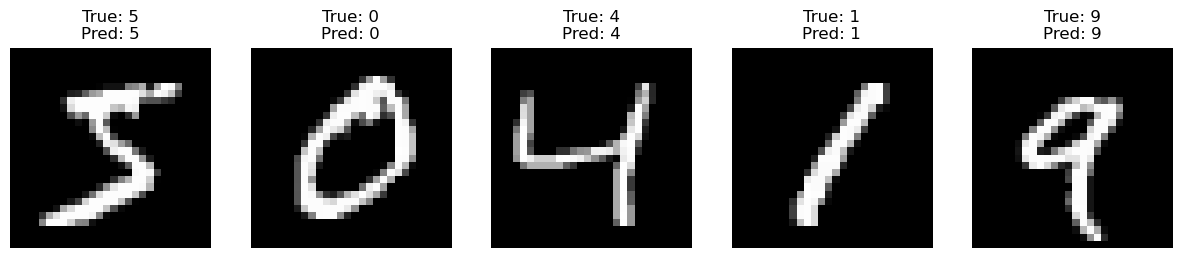

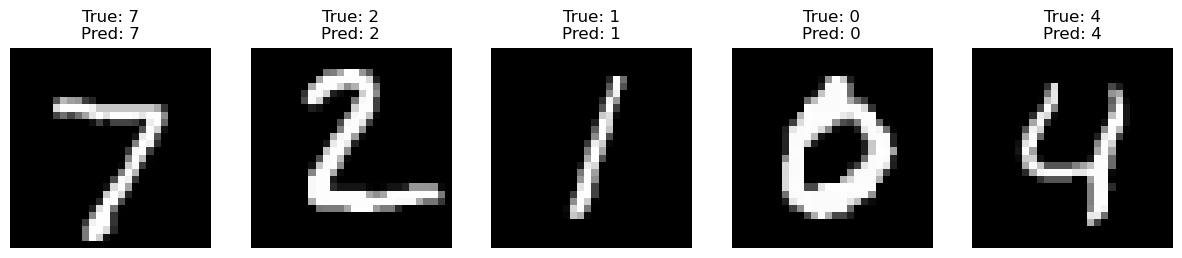

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Step 1: Load and preprocess the data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the data
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to fit the model
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Step 2: Build the CNN model
modelll = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 3: Compile the model
modelll.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 4: Train the model
historyyy = modelll.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))

# Step 5: Evaluate the model on test data
test_loss, test_acc = modelll.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

# Step 6: Make predictions on the test data
y_test_pred = modelll.predict(X_test)
y_train_pred = modelll.predict(X_train)

# Step 7: Plot some predictions for training data
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_train[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {np.argmax(y_train[i])}\nPred: {np.argmax(y_train_pred[i])}')
    ax.axis('off')

# Step 8: Plot some predictions for test data
fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f'True: {np.argmax(y_test[i])}\nPred: {np.argmax(y_test_pred[i])}')
    ax.axis('off')

plt.show()


In [30]:
pip install pyinstaller

Note: you may need to restart the kernel to use updated packages.Collecting pyinstaller
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 330.3 kB/s eta 0:00:04
   - -------------------------------------- 0.1/1.3 MB 656.4 kB/s eta 0:00:02
   ---- ----------------------------------- 0.1/1.3 MB 983.0 kB/s eta 0:00:02
   ------- -------------------------------- 0.3/1.3 MB 1.4 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.3 MB 2.2 MB/s eta 0:00:01
   --------------------- ------------------ 0.7/1.3 MB 2.6 MB/s eta 0:00:01
   -------------------------------- ------- 1.1/1.3 MB 3.3 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 3.8 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 3.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/71.8 kB ? eta -:--:--
   ---------------------------------------- 71.8/71.8 kB 3.8 MB/s eta 0:00:00
   --

In [ ]:
pyinstaller realtime